In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from math import sqrt
from sklearn import utils
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import re

In [2]:
file_data = ''
file_path = 'D:/vscode-projects/Python-projects/ML/hw3/seeds_dataset.txt'
with open(file_path, 'r') as f:
    for line in f:
    
        line = re.sub(r'[\t]+', '\t', line)
        file_data += line
with open(file_path, 'w') as f:
    f.write(file_data)

In [3]:
# load data
df = pd.read_csv('D:/vscode-projects/Python-projects/ML/hw3/seeds_dataset.txt', 
                 names = ['area', 'perimeter', 'compactness', 'length of kernel', 
                 'width of kernel', 'asymmetry coefficient', 'length of kernel groove', 'label'], delimiter='\t',index_col='label')  


feature_names = df.columns.values
datas = df.values
datas = datas.astype('float64')
labels = df.index.values
labels -= 1
datas, labels = utils.shuffle(datas, labels)


# print(feature_names)
# print(datas.shape)
# print(labels.shape)

In [4]:
def random_create_sample(features_max, features_min, n):
    samples = np.zeros((n, len(features_max)))
    for i in range(len(features_max)):
        
        samples[:, i] = np.random.uniform(low=features_min[i], high=features_max[i], size=n)
        
    return samples

def Euclidean_distance(p1, p2):
    dis = 0
    for i in range(p1.shape[0]):
        dis += (p1[i] - p2[i])**2
    dis = sqrt(dis)

    return dis
def K_means(datas, k, max_iterate):
    features_max = datas.max(axis=0)
    features_min = datas.min(axis=0)

    centers = random_create_sample(features_max, features_min, k)
    
    clusters = np.zeros(datas.shape[0])

    for iterate in range(max_iterate):
        
        pre_clusters = clusters.copy()

        # assignment step
        for i in range(datas.shape[0]):
            min_dis = 10000000
            for j in range(k):
                dis = Euclidean_distance(centers[j], datas[i])
                if(dis < min_dis):
                    min_dis = dis
                    clusters[i] = j

        # update step
        for i in range(k):
            cluster_mask = [predict in [i] 
                    for predict in clusters]
            points_in_cluster = datas[cluster_mask]
            if(points_in_cluster.shape[0]!=0):
                centers[i] = points_in_cluster.mean(axis=0)

        if np.array_equal(pre_clusters, clusters):
            break

    return clusters, centers  
    
def plot_confusion_matrix(mat, title, xyticklabels, pos=None):
    if pos != None:
        plt.subplot(pos)
    sns.heatmap(mat.T, square=True, annot=True, fmt='.2f', cbar=False,
                xticklabels=xyticklabels, yticklabels=xyticklabels)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.title(title)     
def assign_predict_labels(clusters, labels, n):
    assignment = np.zeros(n)
    for i in range(n):
        cluster_mask = [predict in [i] 
                    for predict in clusters]
        cluster_label = labels[cluster_mask]
        assignment[i] = np.argmax(np.bincount(cluster_label))
        
    # print(assignment)
    
    cp_clusters = clusters.copy()
    for i in range(n):
        clusters = np.where(cp_clusters == i, assignment[i], clusters)    # if cp_clusters's element value == i, 
                                                                             # change this element value to assignment[i] 
                                                                             # else remains its value

    return clusters                                                           

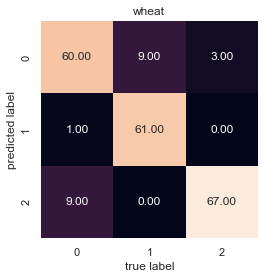

   Precision    Recall
0   0.833333  0.857143
1   0.983871  0.871429
2   0.881579  0.957143
accuracy      0.895238


In [20]:
clusters, centers = K_means(datas, 3, 2000)
predicts = assign_predict_labels(clusters, labels, 3)
# print(predicts)
plot_confusion_matrix(confusion_matrix(labels, predicts), 'wheat', [0, 1, 2])
plt.show()

precision = metrics.precision_score(labels, predicts, average=None)
recall = metrics.recall_score(labels, predicts, average=None)
accuracy = metrics.accuracy_score(labels, predicts)

table = pd.DataFrame( [[precision[0], recall[0]],[precision[1], recall[1]], [precision[2], recall[2]]], 
        index=[0, 1, 2],
        columns=['Precision', 'Recall'])
print(table)
print('accuracy      {:.6f}'.format(accuracy))

[0.8293852  0.16363245]


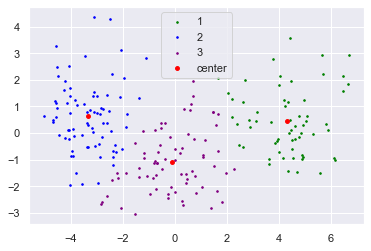

In [6]:
# question

pca = PCA(n_components=2)
pca.fit(datas)
pca_datas = pca.transform(datas)
print(pca.explained_variance_ratio_)

predicts, centers = K_means(pca_datas, 3, 2000)

# print(predicts)
# print(centers)


st0 = plt.scatter(pca_datas[predicts == 0, 0], pca_datas[predicts == 0, 1], s=2.5, color='green')
st1 = plt.scatter(pca_datas[predicts == 1, 0], pca_datas[predicts == 1, 1], s=2.5, color='blue')
st2 = plt.scatter(pca_datas[predicts == 2, 0], pca_datas[predicts == 2, 1], s=2.5, color='purple')
stc = plt.scatter(centers[:, 0], centers[:, 1], s=15, color='red')

plt.legend([st0, st1, st2, stc], [1, 2, 3, 'center'])


plt.show()